In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
F = len('Kamil')
L = len('Baradziej')

## Excercise 1 - Generated Quantities Block

In [5]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,9.25448,10.0,12.0,12.0,7.0,8.0
1,0.0,0.0,112.32300,108.0,107.0,103.0,112.0,115.0
2,0.0,0.0,152.78100,165.0,154.0,159.0,136.0,158.0
3,0.0,0.0,184.42500,191.0,188.0,182.0,195.0,180.0
4,0.0,0.0,180.24500,197.0,182.0,214.0,191.0,165.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,84.44720,90.0,87.0,90.0,94.0,77.0
996,0.0,0.0,10.46150,12.0,13.0,12.0,11.0,4.0
997,0.0,0.0,34.56810,32.0,30.0,35.0,39.0,23.0
998,0.0,0.0,1.40162,0.0,3.0,3.0,0.0,4.0


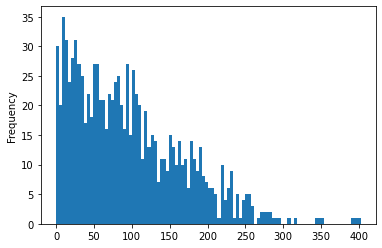

In [11]:
Lambda = df['lambda']
Lambda.plot.hist(bins=100)
plt.show()

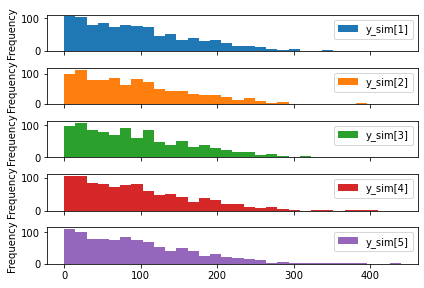

In [13]:
df2 = df.drop(df.columns[0:3],axis=1) 
df2.plot.hist(subplots=True, bins=30) 
plt.tight_layout()
plt.show()

## Excercise 2 - constraints on the data



In [21]:
bern2 = CmdStanModel(stan_file='code_2.stan')
bern2_2 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [22]:
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
samp_bern2_2 = bern2_2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


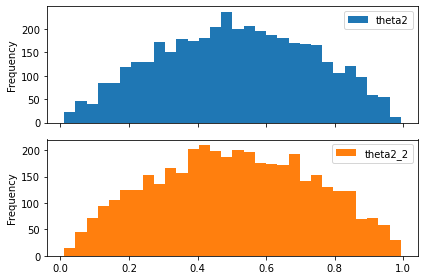

In [26]:
theta2 = samp_bern2.stan_variable('theta')
theta2_2 = samp_bern2_2.stan_variable('theta')
df = pd.DataFrame({'theta2': theta2, 'theta2_2': theta2_2}) 
df.plot.hist(subplots=True, bins=30)
plt.tight_layout()
plt.show()

## Excercise 3 - constraints on the parameters


#### Unconstrained parameters

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing


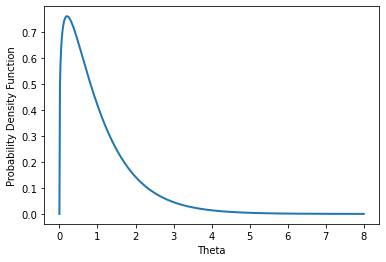

In [29]:
model_gm3 = CmdStanModel(stan_file='code_4.stan')
out_gamma3 = model_gm3.sample(output_dir='samples', iter_sampling=5000, iter_warmup=1000, seed=4838282) 
out_gamma3.diagnose()

N=550
xs3 = np.linspace(0, 8, N)
p3 = stats.gamma.pdf(xs3, 1.25, scale = 1 / 1.25)
plt.plot(xs3, p3, linewidth=2)
plt.gca().set_xlabel("Theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Diagnostic message: 
Rejecting initial value:
         Log probability evaluates to log(0), i.e. negative infinity.
         Stan can't start sampling from this initial value.
         
That happens for negative thetas but stan somehow manages to fix this on its own!!!

#### Constrained parameter

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


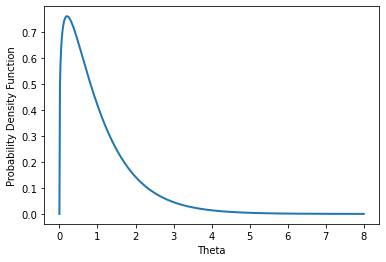

In [34]:
model_gm3_2 = CmdStanModel(stan_file='code_5.stan')
out_gamma3_2 = model_gm3_2.sample(output_dir='samples', iter_sampling=5000, iter_warmup=1000, seed=4838282) 
out_gamma3_2.diagnose()

N=550
xs3 = np.linspace(0, 8, N)
p3 = stats.gamma.pdf(xs3, 1.25, scale = 1 / 1.25)
plt.plot(xs3, p3, linewidth=2)
plt.gca().set_xlabel("Theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

There are no warning messages.